In [103]:
import sys
sys.path.insert(0,'..')
from functions import *

In [104]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import root_mean_squared_error, r2_score

In [105]:
#https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended?select=palmerpenguins_extended.csv
Path = "C:/Users/Billy/Documents/University/Year 4/Comp/CW2/palmerpenguins_extended.csv"
df_penguin = get_data(Path)
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [106]:
col = ['species','island','sex','diet','life_stage','health_metrics']
for i in range(6):
    print(col[i],":",df_penguin[col[i]].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Biscoe' 'Dream' 'Torgensen']
sex : ['female' 'male']
diet : ['fish' 'krill' 'parental' 'squid']
life_stage : ['adult' 'juvenile' 'chick']
health_metrics : ['overweight' 'healthy' 'underweight']


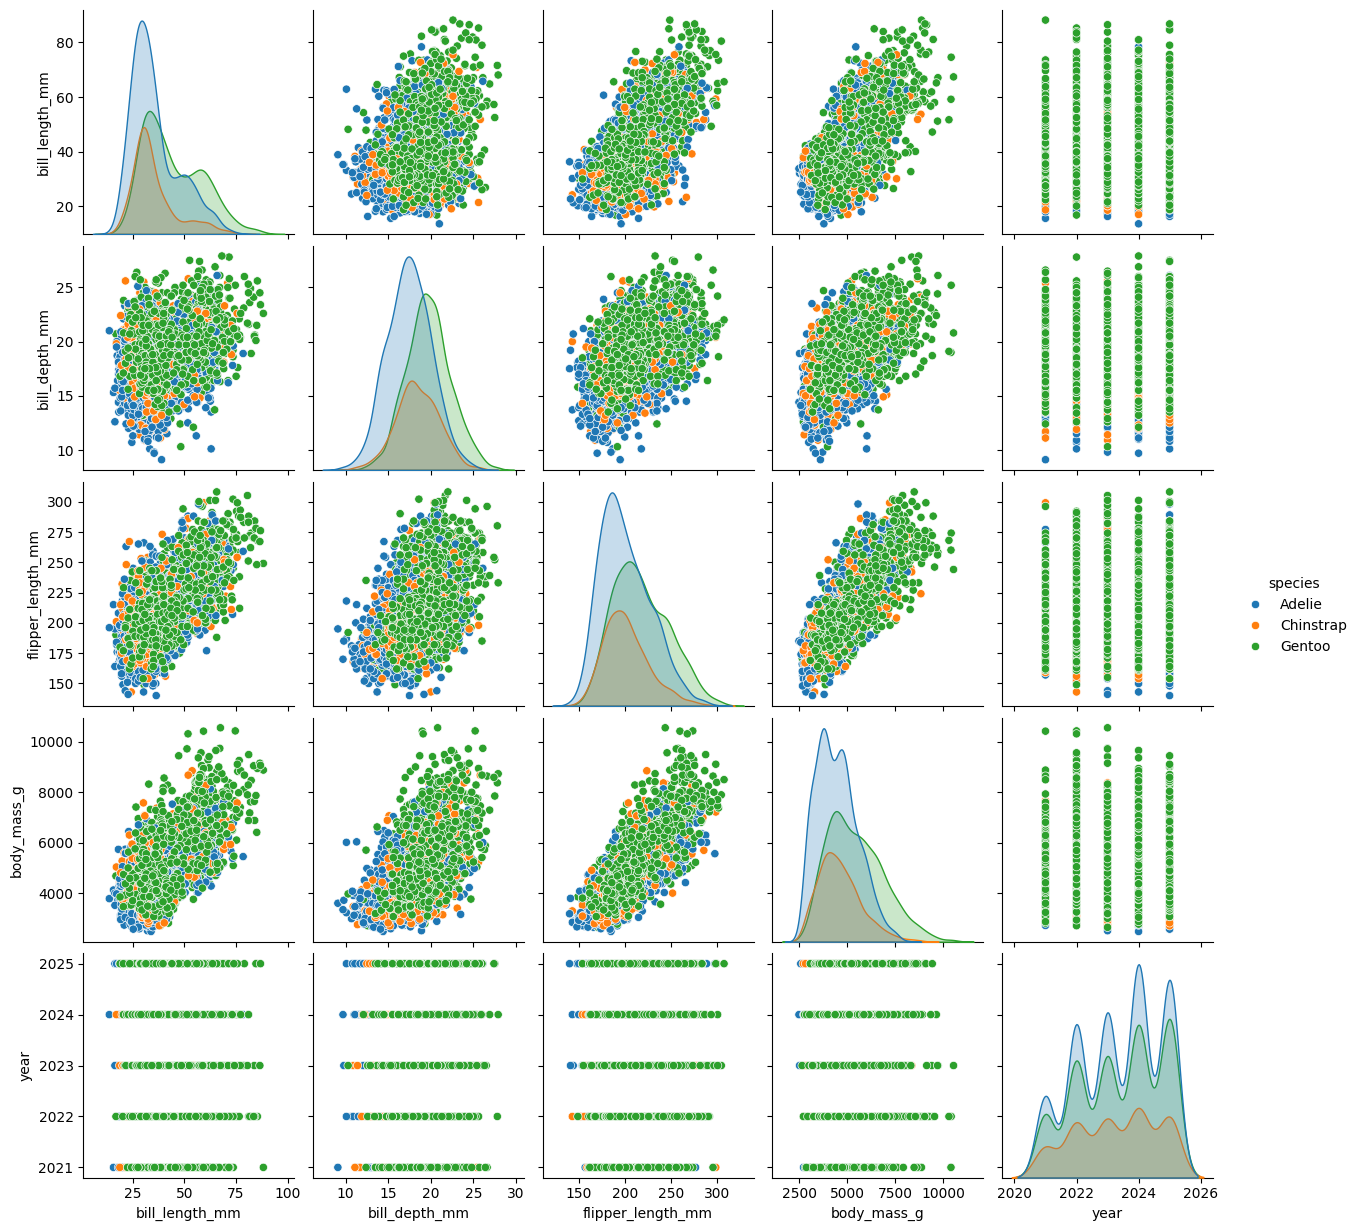

In [107]:
import seaborn as sns

sns.pairplot(df_penguin,hue='species')

In [108]:
df_penguin = augment_data(df_penguin);
df_penguin.head()

c:\Users\Billy\Documents\University\Year 4\Comp\CW2\CW2 Code\COURSEWORK-2-DATA-SCIENCE-PROJECT\py\Q1_folder\..\functions.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_name.island = dataframe_name.island.replace({'Biscoe':0,'Dream':1,'Torgensen':2})
c:\Users\Billy\Documents\University\Year 4\Comp\CW2\CW2 Code\COURSEWORK-2-DATA-SCIENCE-PROJECT\py\Q1_folder\..\functions.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe_name.species = dataframe_name.species.replace({'Adelie':0,'Chinstrap':1,'Gentoo':2})
c

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,0,0,53.4,17.8,219.0,5687.0,0,0,0,0
1,0,0,49.3,18.1,245.0,6811.0,0,0,0,0
2,0,0,55.7,16.6,226.0,5388.0,0,0,0,0
3,0,0,38.0,15.6,221.0,6262.0,0,0,0,0
4,0,0,60.7,17.9,177.0,4811.0,0,0,1,0


In [109]:
Xtrain, Xtest, ytrain, ytest = datasplit_train_test(df_penguin)

In [110]:

DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(Xtrain,ytrain)

In [122]:
yPred = DecisionTree .predict(Xtest)
DecisionTree .score(Xtest,ytest)
#print(r2_score(y_pred=yPred,y_true=ytest))
#print(root_mean_squared_error(y_pred=yPred,y_true=ytest))

train_accuracy = DecisionTree.score(Xtrain, ytrain)
test_accuracy = DecisionTree.score(Xtest, ytest)
print(f"Training accuracy on {train_accuracy}")
print(f"Testing accuracy on {test_accuracy}")

Training accuracy on 1.0
Testing accuracy on 0.7623906705539358


In [112]:
#model pararmeters
n_nodes = DecisionTree.get_depth()
n_leaves = DecisionTree.get_n_leaves()
model_params = DecisionTree.get_params()
model_params_df_dt_clf = pd.DataFrame([model_params]).T
print(f"nodes: {n_nodes},")
print(f"leaves: {n_leaves},")
print(f"model parameters:")
display(model_params_df_dt_clf)
print("\n")

nodes: 26,
leaves: 432,
model parameters:


,0
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


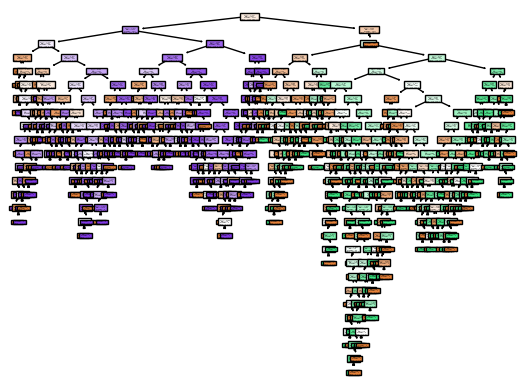

In [113]:
fig = plt.figure()
tree.plot_tree(DecisionTree, filled=True)
plt.show()

In [114]:
from sklearn.model_selection import cross_validate
m = np.linspace(1,50,50,dtype=int)
data = []
for i in m:
  clfm = DecisionTreeClassifier(random_state=0,max_depth=i)
  cv_results = cross_validate(clfm, Xtrain, ytrain, cv=10)
  scores = cv_results['test_score']
  error_rate = 1- scores.mean()
  data.append([i,error_rate])
  #print('CV error = ', error_rate)
print(data)

[[np.int64(1), np.float64(0.3312581287325813)], [np.int64(2), np.float64(0.3024804246848042)], [np.int64(3), np.float64(0.26930723291307246)], [np.int64(4), np.float64(0.272220305242203)], [np.int64(5), np.float64(0.2652873258128732)], [np.int64(6), np.float64(0.273686794956868)], [np.int64(7), np.float64(0.2667644326476444)], [np.int64(8), np.float64(0.2529263437292635)], [np.int64(9), np.float64(0.24599601857996023)], [np.int64(10), np.float64(0.24272461844724624)], [np.int64(11), np.float64(0.2347060384870604)], [np.int64(12), np.float64(0.2310683477106834)], [np.int64(13), np.float64(0.23470338420703396)], [np.int64(14), np.float64(0.22741074983410747)], [np.int64(15), np.float64(0.23360982083609827)], [np.int64(16), np.float64(0.23179429329794288)], [np.int64(17), np.float64(0.23396947577969474)], [np.int64(18), np.float64(0.2357956204379562)], [np.int64(19), np.float64(0.23542667551426677)], [np.int64(20), np.float64(0.23542534837425355)], [np.int64(21), np.float64(0.233239548772

13


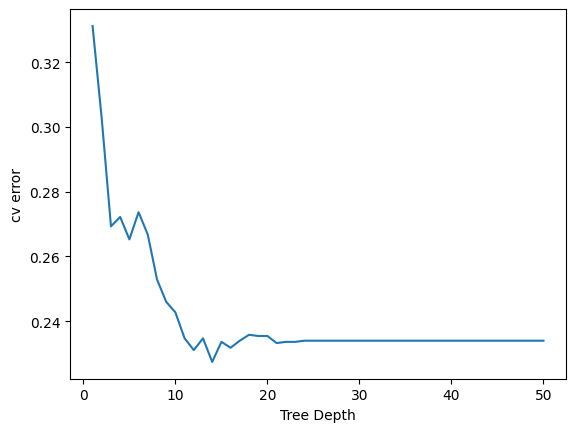

In [115]:
data = np.array(data)
treedepth = (data[:,0]).astype(dtype=int)
#print(treedepth)
cverr = (data[:,1])
#print(cverr)

plt.figure
plt.plot(treedepth,cverr)
plt.xlabel("Tree Depth")
plt.ylabel("cv error")

print(np.argmin(cverr))

In [119]:
DecisionTree_reduced = DecisionTreeClassifier(max_depth=13)
DecisionTree_reduced = DecisionTree_reduced.fit(Xtrain,ytrain)

In [123]:
train_accuracy = DecisionTree_reduced.score(Xtrain, ytrain)
test_accuracy = DecisionTree_reduced.score(Xtest, ytest)
print(f"Training accuracy on {train_accuracy}")
print(f"Testing accuracy on {test_accuracy}")

Training accuracy on 0.9650145772594753
Testing accuracy on 0.7638483965014577


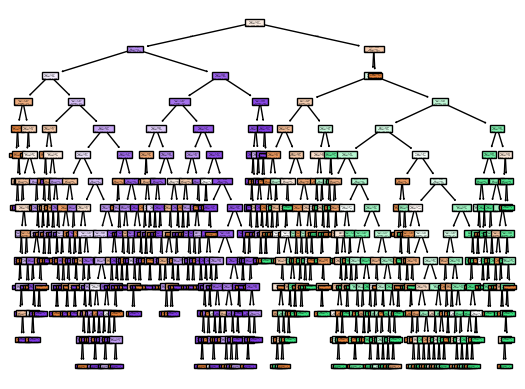

In [120]:

fig = plt.figure()
tree.plot_tree(DecisionTree_reduced, filled=True)
plt.show()

<Axes: >

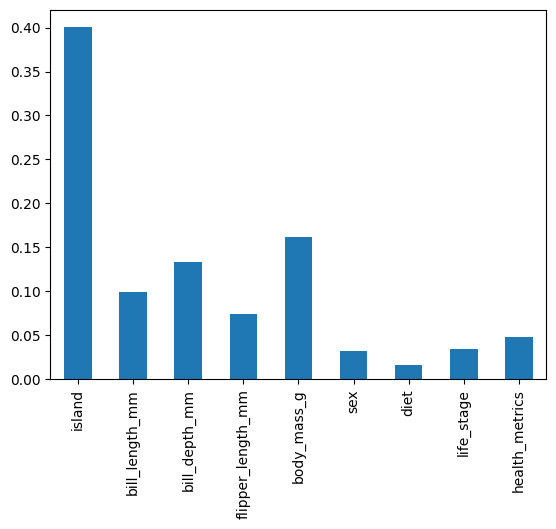

In [117]:
# feature importance
importances = DecisionTree.feature_importances_
features = Xtrain.columns
featureImportance = pd.Series(importances,index=features)

featureImportance.plot.bar()


In [124]:
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics
0,0,0,53.4,17.8,219.0,5687.0,0,0,0,0
1,0,0,49.3,18.1,245.0,6811.0,0,0,0,0
2,0,0,55.7,16.6,226.0,5388.0,0,0,0,0
3,0,0,38.0,15.6,221.0,6262.0,0,0,0,0
4,0,0,60.7,17.9,177.0,4811.0,0,0,1,0


In [209]:
for i in range(3):
    #print(i)
    test = Xtest[ytest['species'] == i]
    leg = len(test)
    test2 = pd.DataFrame([i]*leg,columns=ytest.columns)

    test_accuracy = DecisionTree.score(test, test2)
    print(f"Testing accuracy on class {i}: {test_accuracy}\n")


Testing accuracy on class 0: 0.7072368421052632

Testing accuracy on class 1: 0.664

Testing accuracy on class 2: 0.8754863813229572

